In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import mne

In [2]:
file_path = '/users/e4/E-2/DEAP_DATA/s10.dat'
data = np.fromfile(file_path, dtype=np.float32)

n_channels = 40
n_time_points = 8064
n_trials = len(data) // (n_channels * n_time_points)
data = data[:n_trials * n_channels * n_time_points].reshape(n_trials, n_channels, n_time_points)
subset = data[:10]
print (subset.shape)

(10, 40, 8064)


In [3]:
if np.isnan(subset).any() or np.isinf(subset).any():
    subset = np.nan_to_num(subset)
    print("NaNs or Infs found and replaced.")
else:
    print("No NaNs or Infs found.")

NaNs or Infs found and replaced.


In [4]:
subset_flattened = subset.reshape(n_channels, 10 * n_time_points)
info = mne.create_info(ch_names=[f'EEG {i+1}' for i in range(n_channels)], sfreq=128, ch_types='eeg')
raw = mne.io.RawArray(subset_flattened, info)
raw.filter(l_freq=1.0, h_freq=50.0, fir_design='firwin')
print(raw.info)

Creating RawArray with float64 data, n_channels=40, n_times=80640
    Range : 0 ... 80639 =      0.000 ...   629.992 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 s)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG 1, EEG 2, EEG 3, EEG 4, EEG 5, EEG 6, EEG 7, EEG 8, EEG 9, ...
 chs: 40 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 40
 projs: []
 sfreq: 128.0 Hz
>


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [5]:
event_id = 1  
events = np.array([[i * n_time_points, 0, 1] for i in range(10)])

Not setting metadata
10 matching events found
Setting baseline interval to [-0.203125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 10 events and 91 original time points ...
1 bad epochs dropped


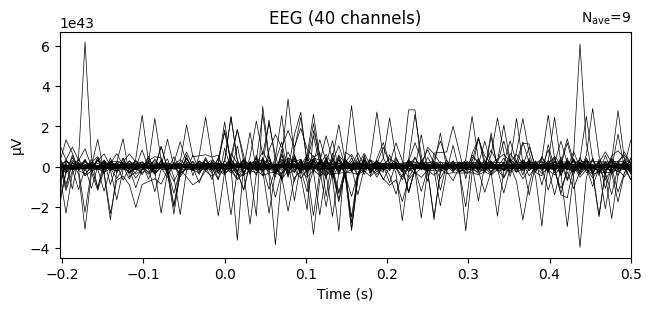

Using matplotlib as 2D backend.


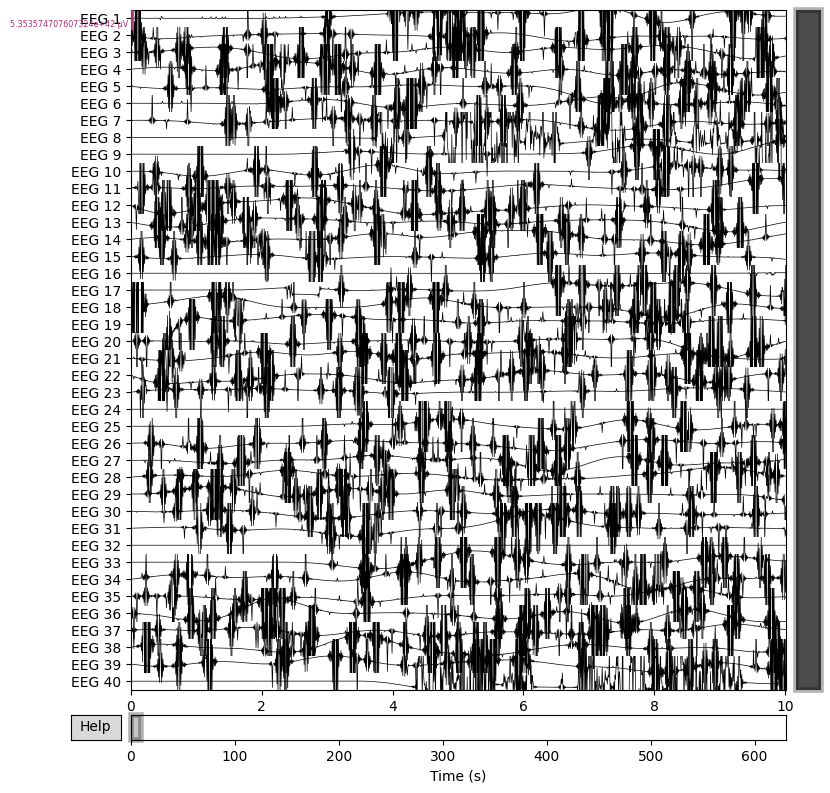

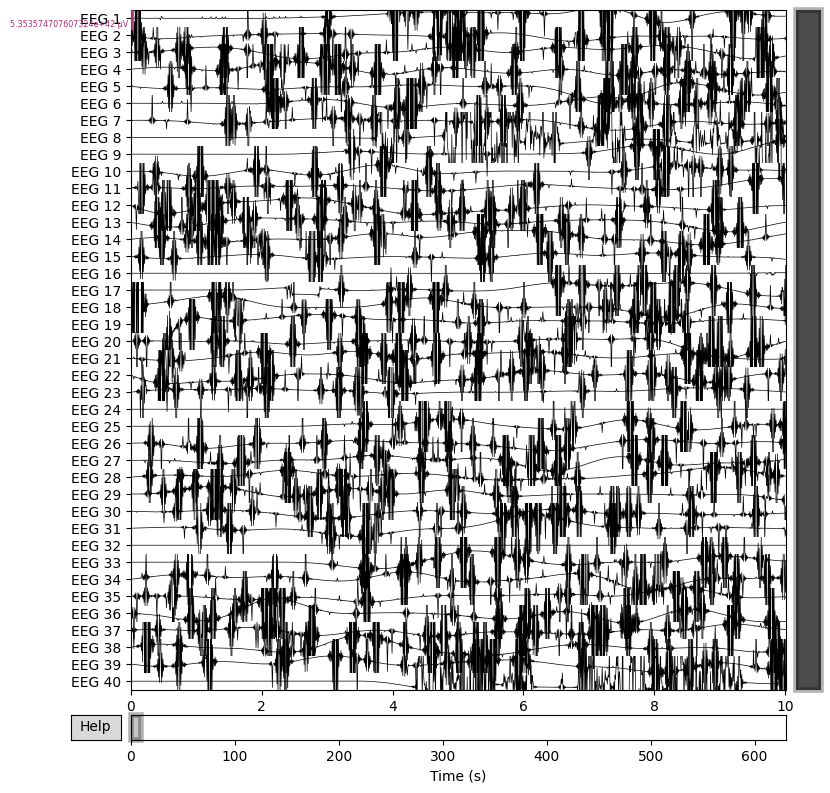

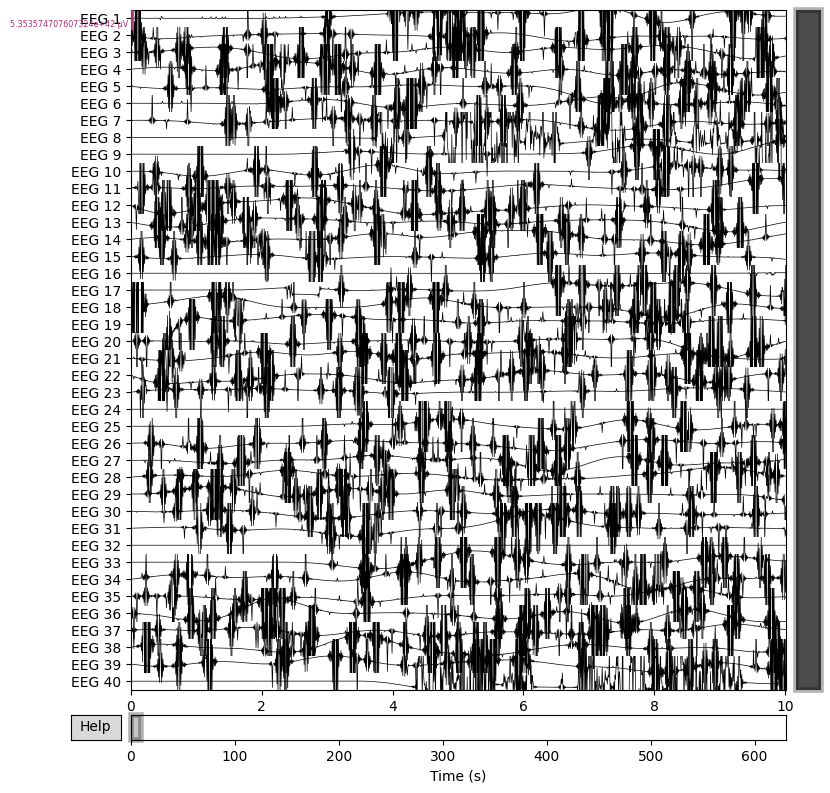

In [6]:
tmin, tmax = -0.2, 0.5  
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=(None, 0), preload=True)
evoked = epochs.average()
evoked.plot()
for ch_name in ['EEG 1', 'EEG 2', 'EEG 3']:
    raw.plot(duration=10, n_channels=40, scalings='auto', title=f"Channel {ch_name}")